# INFS5099: D2D GSR Schema Visualisations
### Richard Shanahan
https://github.com/rjshanahan
  
**The visualisations below are for the D2D CRC 'gold standard' (GSR) repository of news articles relating to Civil Unrest. **
  
The data was exported in CSV format via command: `myDF_GSR.toPandas().to_csv('d2d_gsr_extract.csv')`
  
The date range for the extracted articles**`"2015-05-26"`** and **`"2016-04-13"`**

## Pre-processing
Several pre-processing steps have been applied the exported data including:
- changing Unix date format to dd/mm/yy
- Australian GSR articles only
- removed *noise*, specifically articles tagged as Australia, but with an Indonesian state
- tidied classifications to remove spelling and format inconsistencies

In [ ]:
#load required packages
library(psych)
library(ggplot2)
library(reshape2)
library(plyr)
library(dplyr)
library(devtools)

#set date class
setClass('myDate')
setAs("character","myDate", function(from) as.Date(from, format="%d-%b-%Y %H:%M:%OS"))

#set theme for graphics
theme = theme_set(theme_minimal())
theme = theme_update(legend.position="top",
                    axis.text.x = element_text(angle = 45))
    
#read CSV for GSR exported from D2D
myGSR <- read.csv('d2d_gsr_extract.csv',
                  header=T,
                  sep=",",
                  quote='"',
                  strip.white=T,
                  stringsAsFactors=F,
                  fill=T)


#remove row_id
myGSR <- select(myGSR, -X)
    
#convert datetime
myGSR$key.eventDate  <-  as.Date(as.POSIXct(myGSR$key.eventDate / 1000000000, origin="1970-01-01"))

#structure
# str(myGSR)
#descriptive stats
#describe(myGSR)

#check for duplicate records based
# print(paste0('Total rows: ',nrow(myGSR) ,', Unique rows: ',nrow(unique(myGSR))))

#check if there are any missing values
# print('Missing Values per Variable:')
# colSums(is.na(myGSR)) 

# assign id field for visualisations
myGSR$row_id <- 1:nrow(myGSR)

#recode event
old_event <- as.vector(unique(myGSR$eventType))
myGSR$eventType <- mapvalues(myGSR$eventType,
                             old_event,
                             c("Employment and Wages","Other Government and Political Issues",
                               "Land, Energy and Resources", "Other Social Disruption",
                               "Housing and Shelter", "Land, Energy and Resources",
                               "Other Government and Political Issues", "Land, Energy and Resources",          
                               "Other Economic Issues","Other Economic Issues",                
                               "Other Government and Political Issues"))

#recode states
old_states <- as.vector(unique(myGSR$state))
myGSR$state <- mapvalues(myGSR$state,
                             old_states,
                             c("VIC", "ACT","SA","WA","QLD","NSW","TAS", "QLD","NT",                         
                               "Jakarta Raya","SA","VIC","NSW","WA","TAS","VIC", "ACT","North Sumatera",
                               "QLD","NT","WA","ACT","QLD"))

#recode population groups
old_populationGroup <- as.vector(unique(myGSR$populationGroup))
myGSR$populationGroup <- mapvalues(myGSR$populationGroup,
                                       old_populationGroup,
                         c("Labor","General Population","Ethnic","Medical","Education",
                           "Labor","Labor","Labor","Education","Media",
                           "Business","Religious","Refugees","Religious","Large",
                           "Legal","Medical","Ethnic","Ethnic"))
    
#recode population groups
old_crowd <- as.vector(unique(myGSR$crowdSize))
myGSR$crowdSize <- mapvalues(myGSR$crowdSize,
                                       old_crowd,
                         c("Large","Unknown","Small","Large","Small","Unknown"))
    


# remove incorrectly labelled records (Indonesian states)
myGSR <- myGSR %>%
  filter(state %in% c("VIC", "ACT","SA","WA","QLD","NSW","TAS","NT"))

## Visualisations: *eventType* by Variables

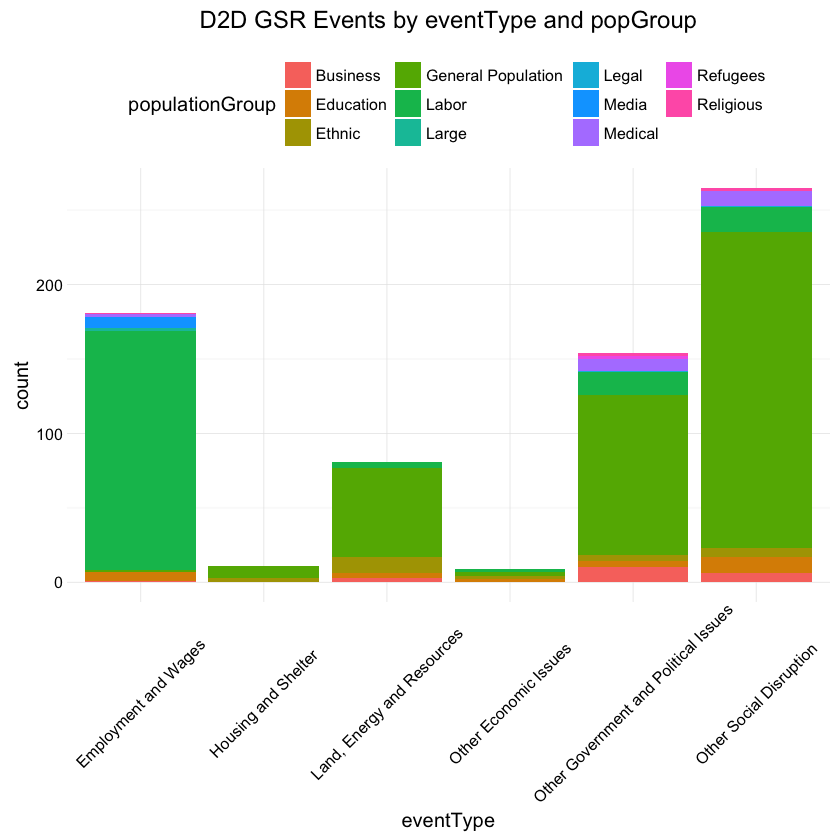

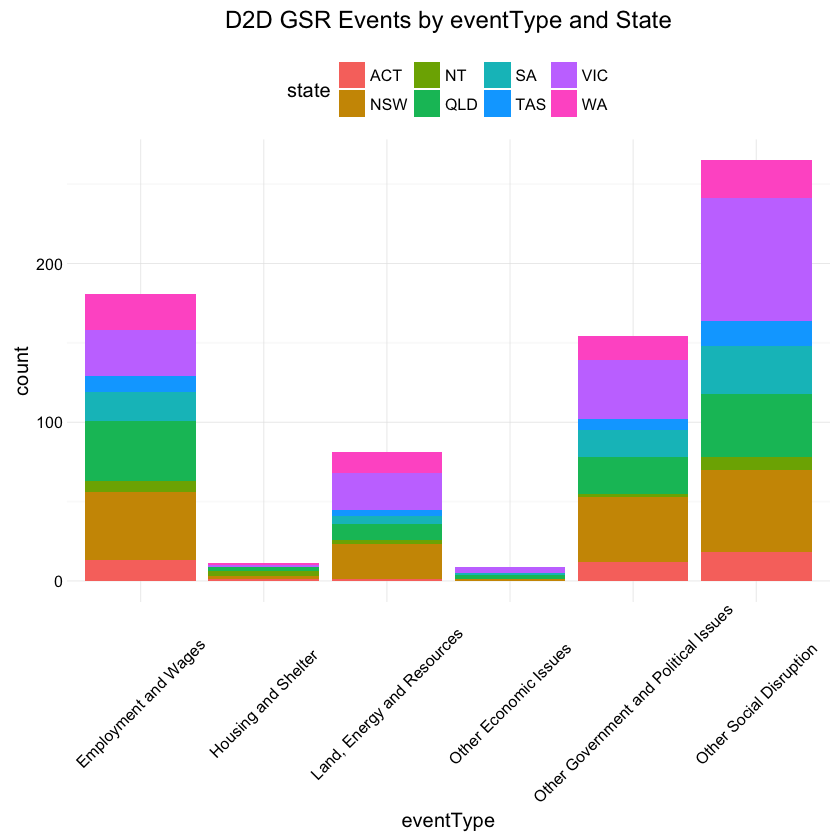

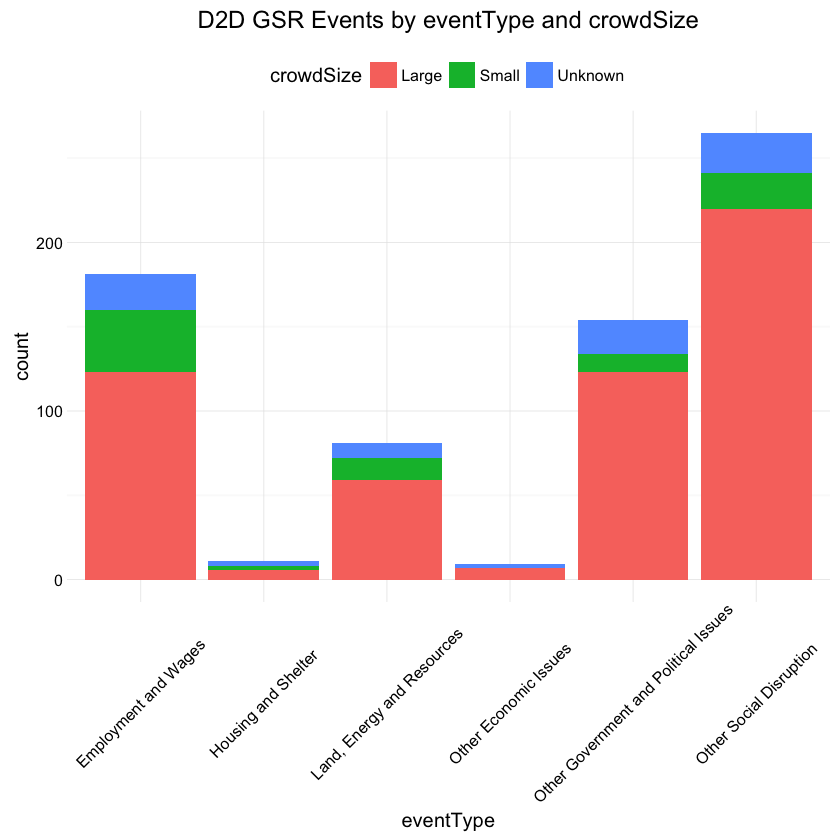

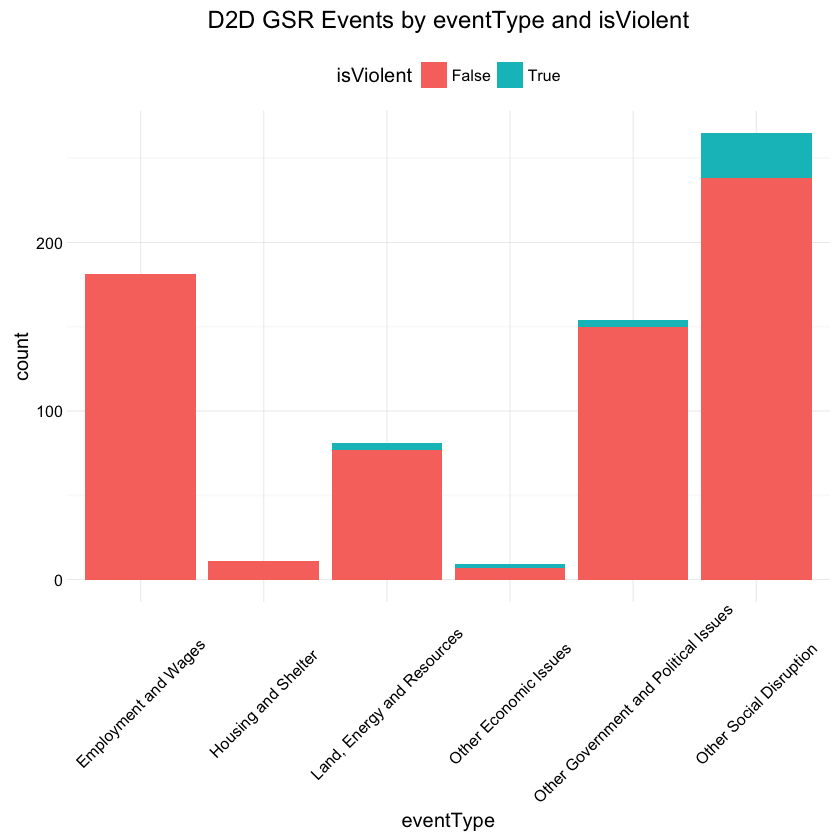

In [2]:
ggplot(data=myGSR, 
       aes(x=eventType,
           fill=populationGroup)) + 
  geom_bar() +
#   coord_flip() +
  ggtitle('D2D GSR Events by eventType and popGroup') +
  xlab('eventType') +
  ylab('count') 

ggplot(data=myGSR, 
       aes(x=eventType,
           fill=state)) + 
  geom_bar() +
  ggtitle('D2D GSR Events by eventType and State') +
  xlab('eventType') +
  ylab('count')

ggplot(data=myGSR, 
       aes(x=eventType,
           fill=crowdSize)) + 
  geom_bar() +
  ggtitle('D2D GSR Events by eventType and crowdSize') +
  xlab('eventType') +
  ylab('count')

ggplot(data=myGSR, 
       aes(x=eventType,
           fill=isViolent)) + 
  geom_bar() +
  ggtitle('D2D GSR Events by eventType and isViolent') +
  xlab('eventType') +
  ylab('count')

## GSR Articles grouped by Month & Year

ERROR: Error in ggplot(data = myGSR_month, aes(x = month, y = total, fill = eventType)): object 'myGSR_month' not found


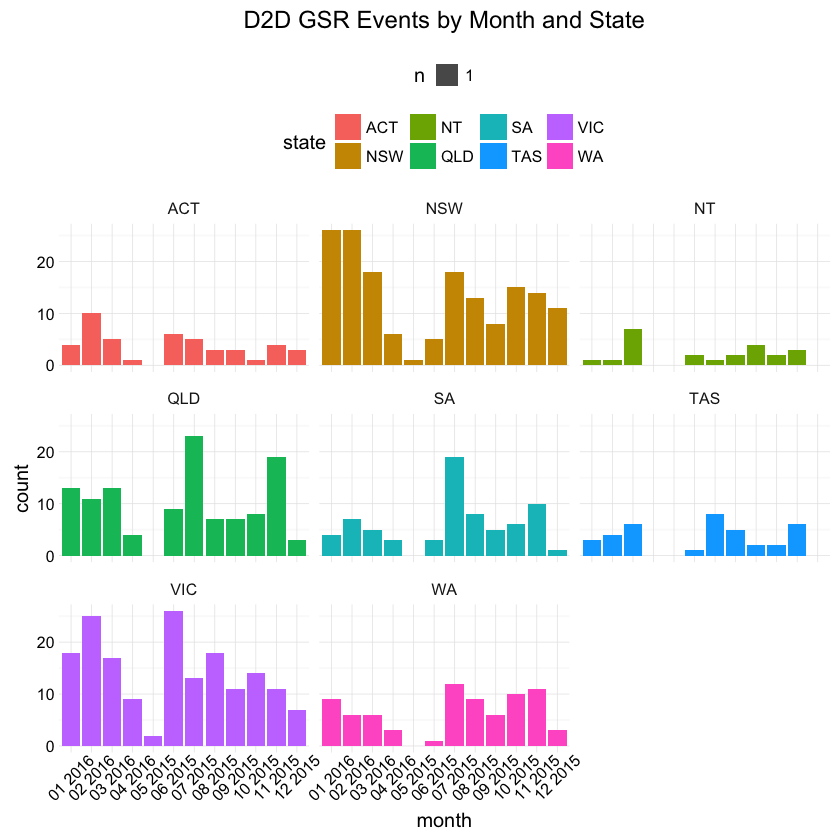

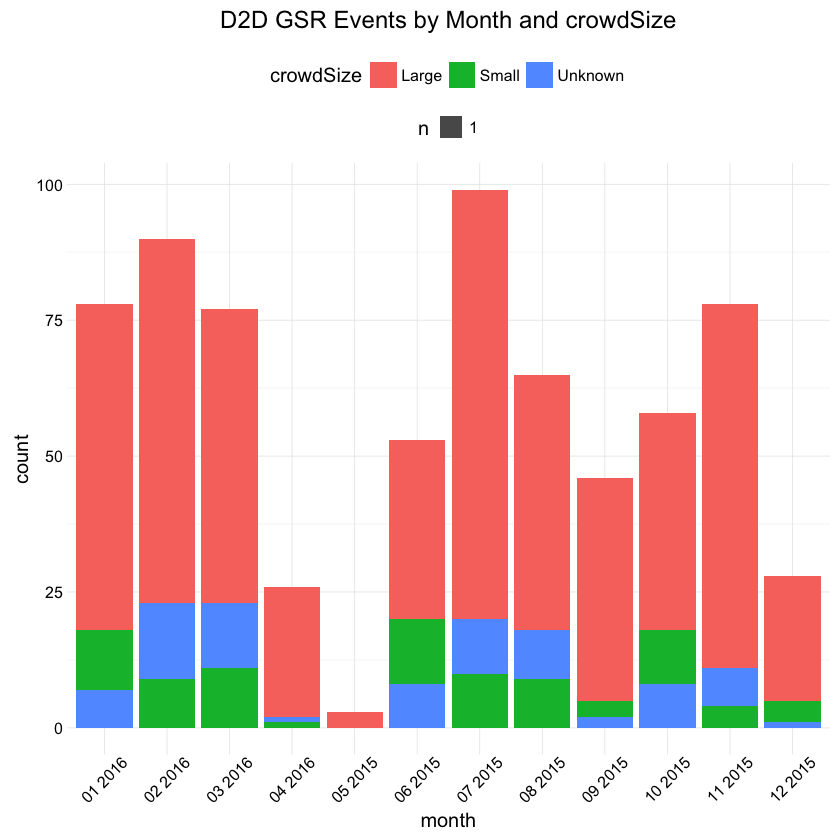

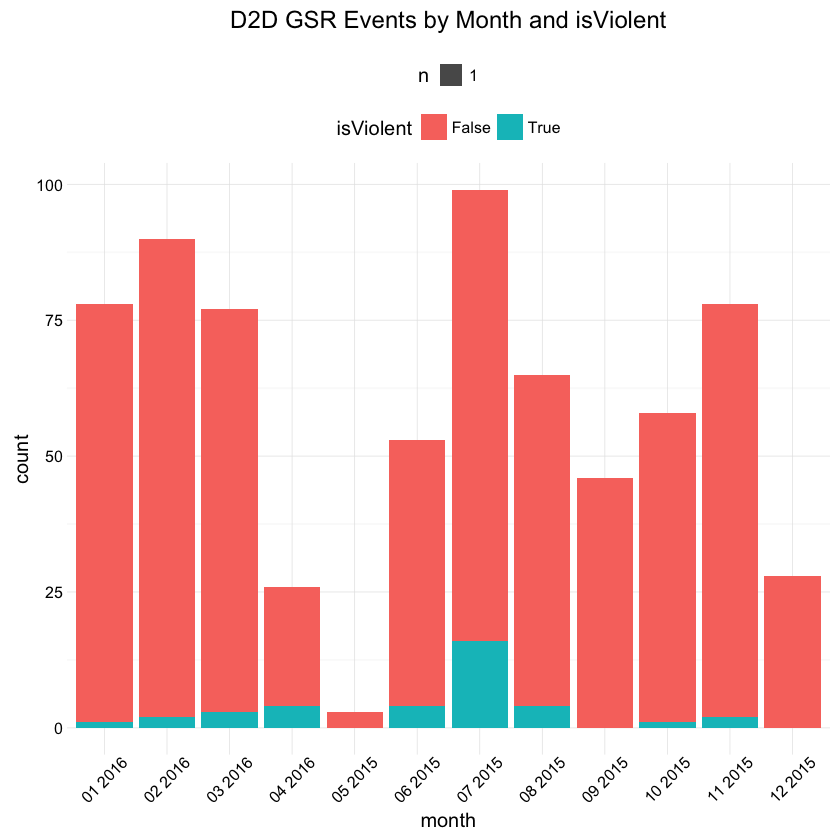

In [3]:

#eventType
myGSR_event <- myGSR %>%
select(key.eventDate, eventType) %>%
mutate(month = format(key.eventDate, "%m %Y")) %>%
group_by(month, eventType) %>%
summarise(total = n()) %>%
arrange(desc(total))

ggplot(data=myGSR_month, 
       aes(x=month,
           y=total,
           fill=eventType)) + 
      geom_bar(stat='sum') +
      facet_wrap(~eventType) +
      ggtitle('D2D GSR Events by Month and eventType') +
      xlab('month') +
      ylab('count')


#state
myGSR_state <- myGSR %>%
select(key.eventDate, state) %>%
mutate(month = format(key.eventDate, "%m %Y")) %>%
group_by(month, state) %>%
summarise(total = n()) %>%
arrange(desc(total))

ggplot(data=myGSR_state, 
       aes(x=month,
           y=total,
           fill=state)) + 
      geom_bar(stat='sum') +
      facet_wrap(~state) +
      ggtitle('D2D GSR Events by Month and State') +
      xlab('month') +
      ylab('count')


#crowd
myGSR_crowd <- myGSR %>%
select(key.eventDate, crowdSize) %>%
mutate(month = format(key.eventDate, "%m %Y")) %>%
group_by(month, crowdSize) %>%
summarise(total = n()) %>%
arrange(desc(total))

ggplot(data=myGSR_crowd, 
       aes(x=month,
           y=total,
           fill=crowdSize)) + 
      geom_bar(stat='sum') +
#       facet_wrap(~crowdSize) +
      ggtitle('D2D GSR Events by Month and crowdSize') +
      xlab('month') +
      ylab('count')

#violent
myGSR_violent <- myGSR %>%
select(key.eventDate, isViolent) %>%
mutate(month = format(key.eventDate, "%m %Y")) %>%
group_by(month, isViolent) %>%
summarise(total = n()) %>%
arrange(desc(total))

ggplot(data=myGSR_violent, 
       aes(x=month,
           y=total,
           fill=isViolent)) + 
      geom_bar(stat='sum') +
#       facet_wrap(~isViolent) +
      ggtitle('D2D GSR Events by Month and isViolent') +
      xlab('month') +
      ylab('count')


## Visualisations: GSR Articles by *Date*

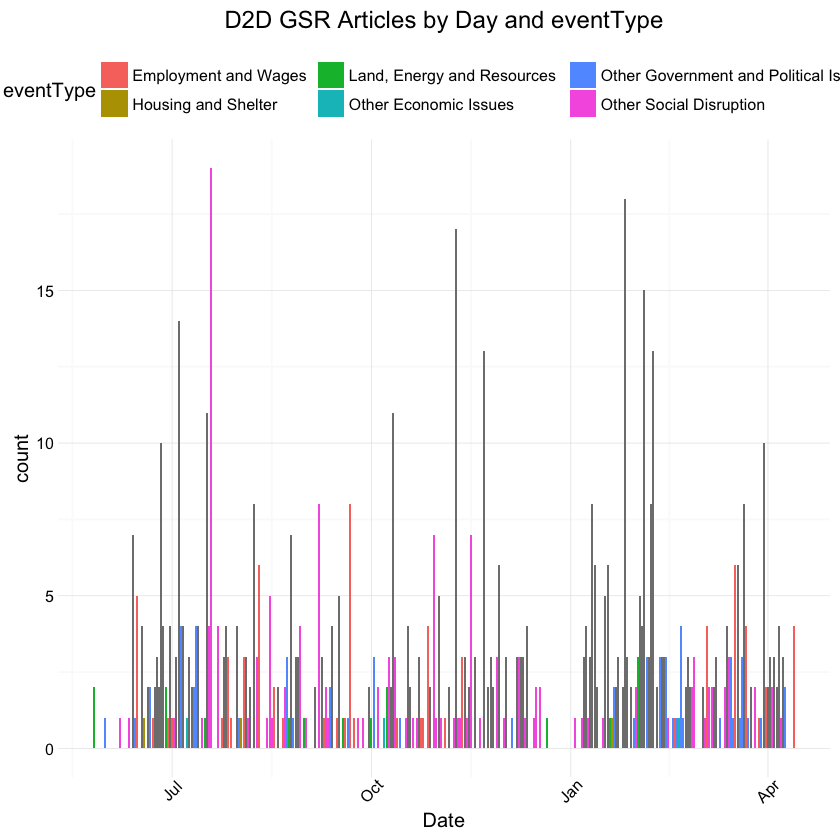

In [5]:
myGSR$date_factor <- factor(as.Date(myGSR$key.eventDate))

ggplot(data=myGSR, 
       aes(x=myGSR$key.eventDate,
           fill=eventType,
           group=date_factor)) + 
    geom_bar() +
    ggtitle('D2D GSR Articles by Day and eventType') +
    xlab('Date') +
    ylab('count')


## GSR Articles by newsSource an City - top *n* records
- change the value of the variable `topN` to view more or fewer records

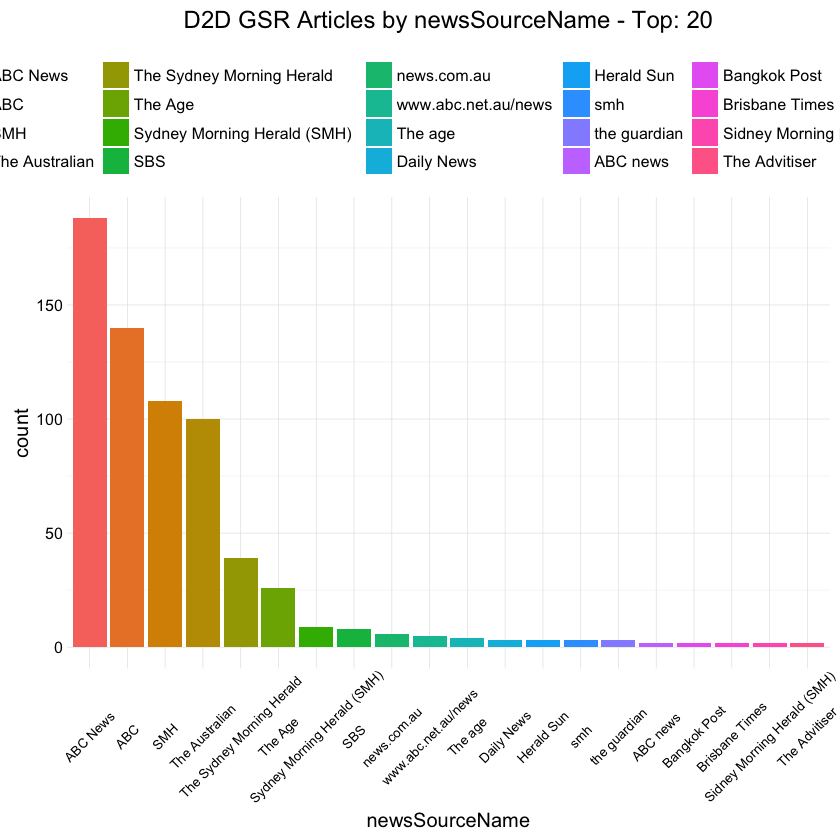

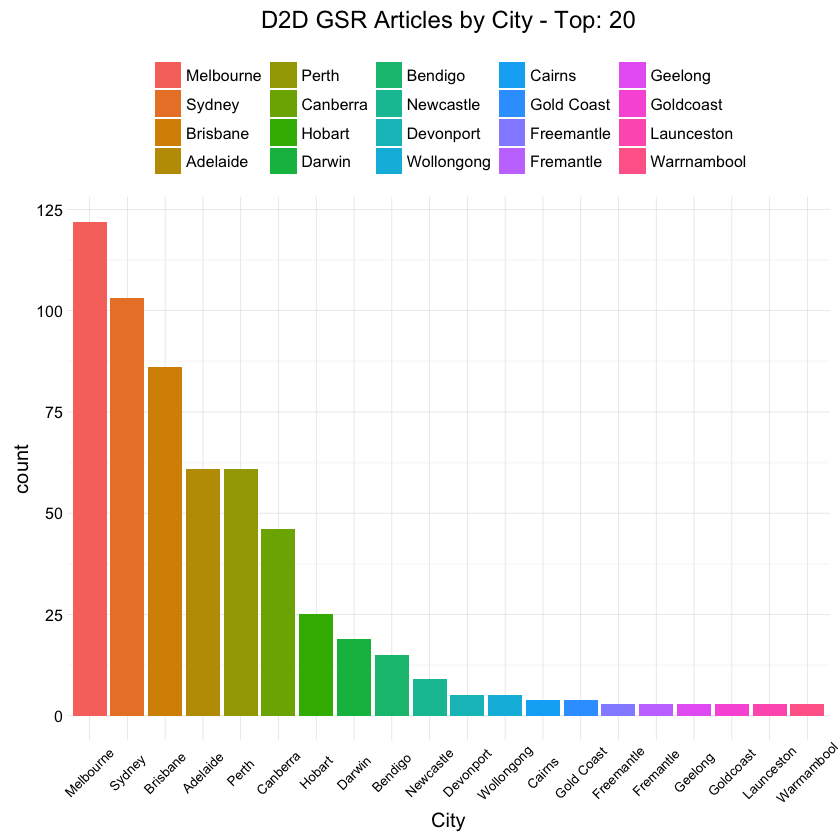

In [6]:

#change for number of records
topN = 20

myGSR_source <- myGSR %>%
select(newsSourceName) %>%
group_by(newsSourceName) %>%
summarise(total = n()) %>%
arrange(desc(total)) %>%
head(topN)


ggplot(data=myGSR_source, 
       aes(x=factor(newsSourceName,levels=unique(newsSourceName)),
          y=total,
          fill=factor(newsSourceName, levels=unique(newsSourceName)))) + 
      geom_bar(stat='identity') +
      ggtitle(paste0('D2D GSR Articles by newsSourceName - Top: ',topN)) +
      xlab('newsSourceName') +
      ylab('count') +
      scale_fill_discrete("") +
     theme(axis.text.x = element_text(size=8))



myGSR_city <- myGSR %>%
select(city) %>%
group_by(city) %>%
summarise(total = n()) %>%
arrange(desc(total)) %>%
head(topN)



ggplot(data=myGSR_city, 
       aes(x=factor(city, levels=unique(city)),
          y=total,
          fill=factor(city, levels=unique(city)))) + 
      geom_bar(stat='identity') +
      ggtitle(paste0('D2D GSR Articles by City - Top: ',topN)) +
      xlab('City') +
      ylab('count') +
      scale_fill_discrete("") +
     theme(axis.text.x = element_text(size=8))